In [ ]:
# 2022-06
# project to visualize GPT sizes

In [1]:
from IPython.display import SVG, display

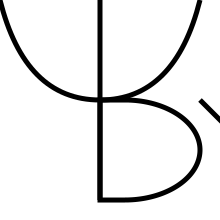

In [2]:
mysvg = """\
<svg width="220" height="220">
<path d="M 100 100 l 0 100 h 25 a 75 50 0 0 0 0 -100 h -25 Z" stroke="black"
  stroke-width="5" fill="none" />
<path d="M 100 100 q 75 0 100 -100" stroke="black"
  stroke-width="5" fill="none" />
<path d="M 100 100 q -75 0 -100 -100" stroke="black"
  stroke-width="5" fill="none" />
<path d="M 100 0 V 200" stroke="black"
  stroke-width="5" fill="none" />
<path d="M 150 150 m 50 -50 l 50 50" stroke="black"
  stroke-width="5" fill="none" />
</svg>"""
display(SVG(data=mysvg))

In [3]:
gpt1_hyp = (12, 12, 64)

In [17]:
def draw_gpt(layers, heads, dimh):
    hspace = (((dimh * 10) // 64) + 5)
    mysvg = f"""\
<svg width="{hspace * heads}" height="{15 * layers}">"""
    for x in range(heads):
        for y in range(layers):
            mysvg += f"""
<rect x="{hspace * x}" y="{15 * y}" \
width="{(dimh * 10) // 64}" height="10" style="fill:rgb(128,128,255);stroke:none" />"""
    mysvg += "</svg>"
    return mysvg

In [8]:
print(draw_gpt(*gpt1_hyp))

<svg width="180" height="180">
<rect x="0" y="0"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="15"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="30"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="45"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="60"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="75"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="90"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="105"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="120"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="135"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="150"width="10" height="10" style="fill:rgb(0,0,255);stroke:none" />
<rect x="0" y="165"width="10" height="10" style="fill:rgb(0,0,25

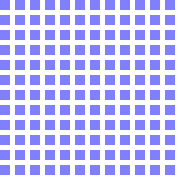

In [28]:
display(SVG(data=draw_gpt(*gpt1_hyp)))

In [29]:
display(SVG(data=draw_gpt(2, 8, 64)))

In [18]:
gpt_layers = [12, 24, 24, 24, 32, 32, 40, 96]
gpt_heads = [12, 16, 16, 16, 32, 32, 40, 96]
gpt_dimh = [64, 64, 96, 128, 80, 128, 128, 128]

gpts = [*zip(gpt_layers, gpt_heads, gpt_dimh)]

for (i, gpt) in enumerate(gpts):
    with open(f'gptviz_{i}.svg', 'w') as f:
        f.write(draw_gpt(*gpt))

In [23]:
def nparams(layers, heads, dimh):
    hidh = heads * dimh
    return 12 * hidh**2 * layers / 10**6, 50257 * hidh / 10 ** 6

In [25]:
[sum(nparams(*gpt)) for gpt in gpts]

[123.532032,
 353.453056,
 756.672,
 1310.885888,
 2645.24032,
 6648.303616,
 12840.22784,
 174563.733504]

In [26]:
[(nparams(*gpt)) for gpt in gpts]

[(84.934656, 38.597376),
 (301.989888, 51.463168),
 (679.477248, 77.194752),
 (1207.959552, 102.926336),
 (2516.5824, 128.65792),
 (6442.450944, 205.852672),
 (12582.912, 257.31584),
 (173946.175488, 617.558016)]

In [41]:
with open(f'gptviz_2L.svg', 'w') as f:
        f.write(draw_gpt(2, 8, 32))

In [40]:
nparams(2, 8, 32)

(1.572864, 12.865792)

In [37]:
sum(_)

32.02304

In [38]:
nparams(36, 20, 1280//20)

(707.7888, 64.32896)